## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import mysql.connector

## Loading Dataset

In [4]:
connection = mysql.connector.connect(host = '18.136.157.135',
                                       user = 'dm_team3',
                                       password = 'DM!$!Team!27@9!20&',
                                       database = 'project_telecom')

In [5]:
cursor = connection.cursor()
cursor.execute('Show tables')

In [6]:
for i in cursor:
    print(i)

('telecom_churn_data',)


In [7]:
pd.read_sql_query('Show tables',connection)

,Tables_in_project_telecom
0,telecom_churn_data


In [8]:
df = pd.read_sql_query('select * from telecom_churn_data',connection)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

### Column Renaming

In [9]:
df = df.rename(columns={'columns1':'State','columns2':'Account_Length','columns3':'Area_Code','columns4':'Phone','columns5':'International_Plan',
                  'columns6':'VMail_Plan','columns7':'VMail_Message','columns8':'Day_Mins','columns9':'Day_Calls','columns10':'Day_Charge',
                  'columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_Mins','columns15':'Night_Calls',
                  'columns16':'Night_Charge','columns17':'International_Mins','columns18':'International_Calls','columns19':'International_Charge',
                  'columns20':'CustServ_Calls','columns21':'Churn'})

### EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

In [11]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
df['Area_Code'].value_counts()

Area_Code
415    2299
408    1161
510    1157
Name: count, dtype: int64

In [13]:
df['International_Plan'].value_counts()

International_Plan
no     4171
yes     446
Name: count, dtype: int64

In [14]:
df['VMail_Plan'].value_counts()

VMail_Plan
no     3381
yes    1236
Name: count, dtype: int64

In [15]:
df['State'].value_counts()

State
WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: count, dtype: int64

In [16]:
df['Churn'].value_counts()

Churn
False.    3961
True.      656
Name: count, dtype: int64

In [17]:
df

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [18]:
df['Churn'] = df['Churn'].str.strip().map({'False.': 0, 'True.': 1})

In [19]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

#### converting numeric column from object

In [21]:
object_cols = df.select_dtypes(include='object').columns

In [22]:
numerical_cols_to_convert = [col for col in object_cols if col not in ['State', 'Phone', 'International_Plan', 'VMail_Plan']]

In [23]:
for col in numerical_cols_to_convert:
    df[col] = pd.to_numeric(df[col])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

### Univarite Analysis

In [25]:
num_cols = ['Account_Length','Area_Code','VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_Calls','International_Charge','CustServ_Calls','Churn']

In [26]:
cat_cols = ['State','International_Plan','VMail_Plan']

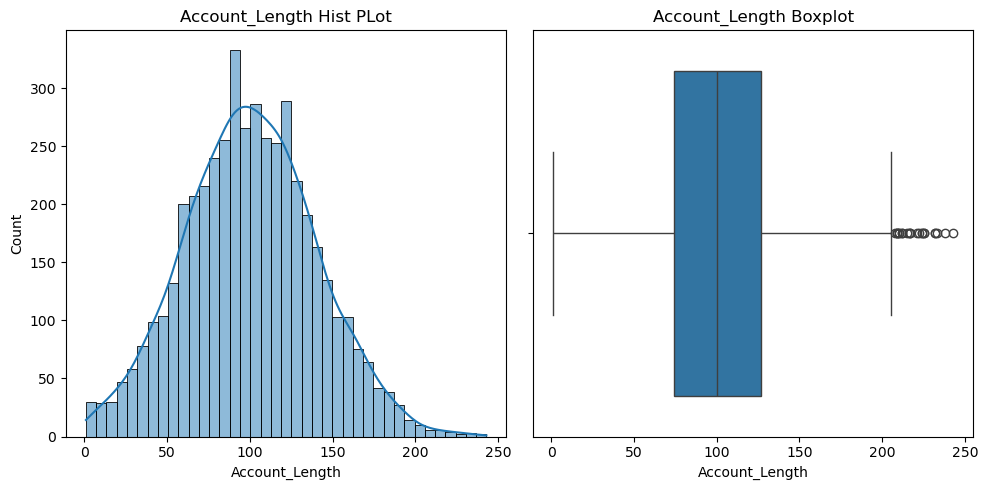

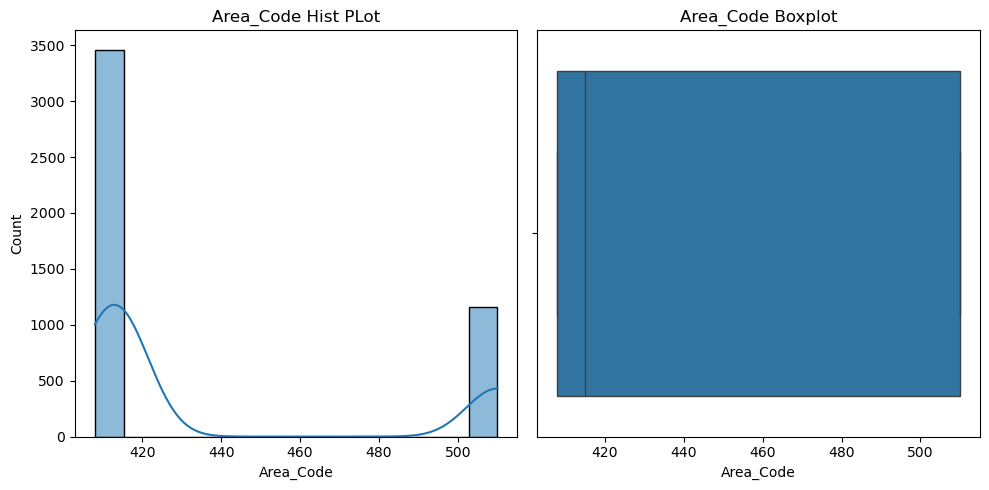

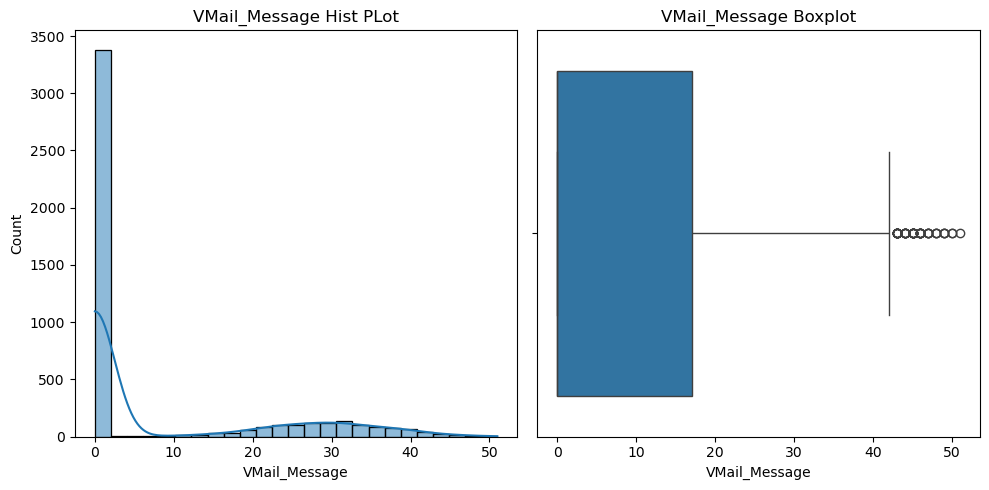

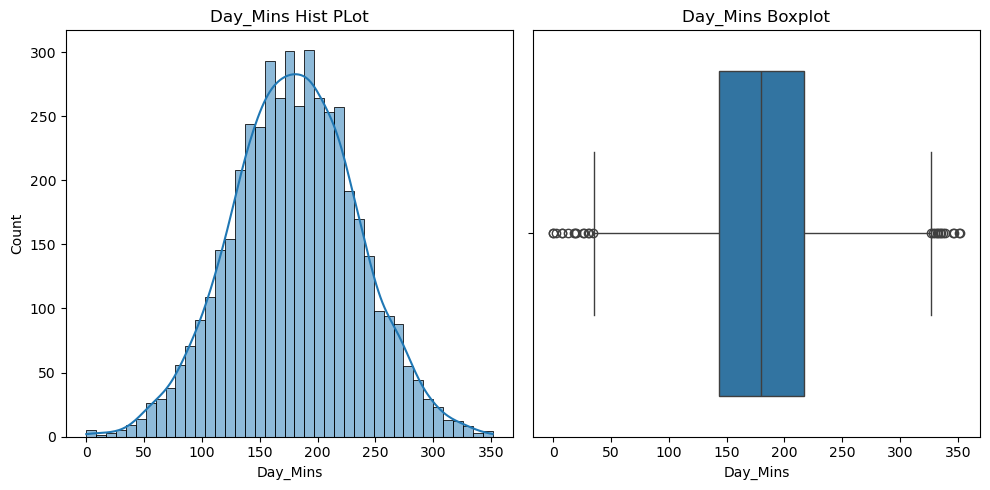

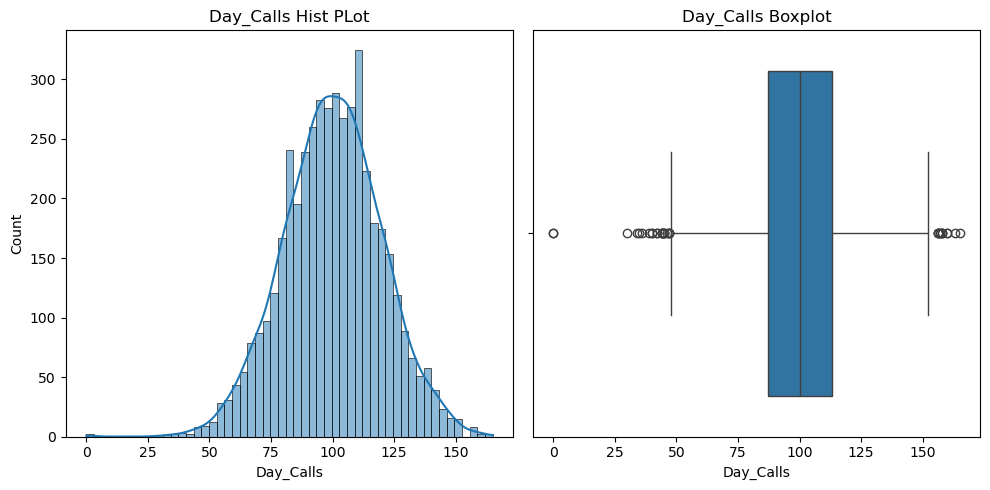

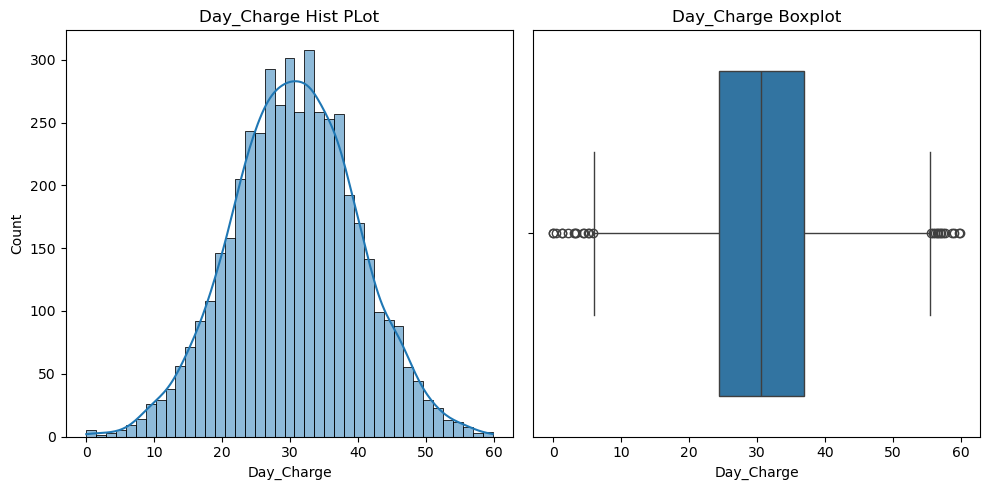

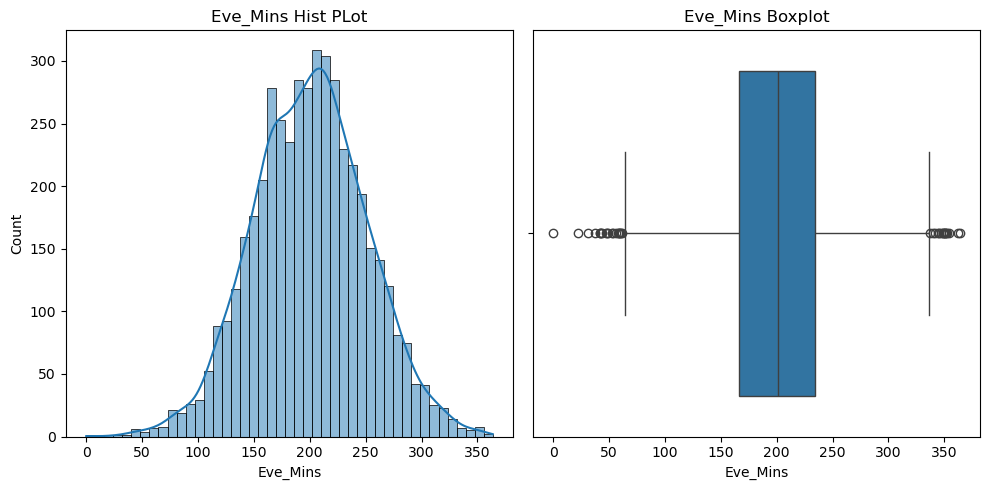

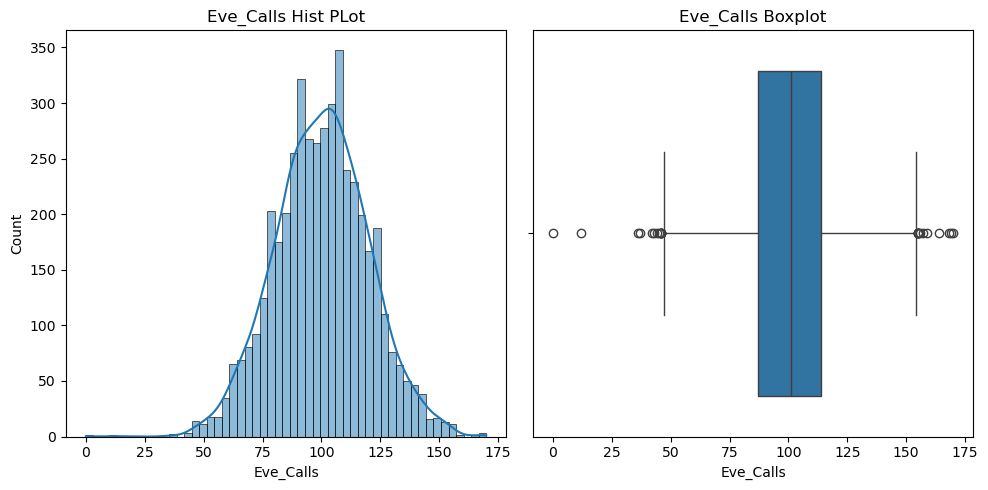

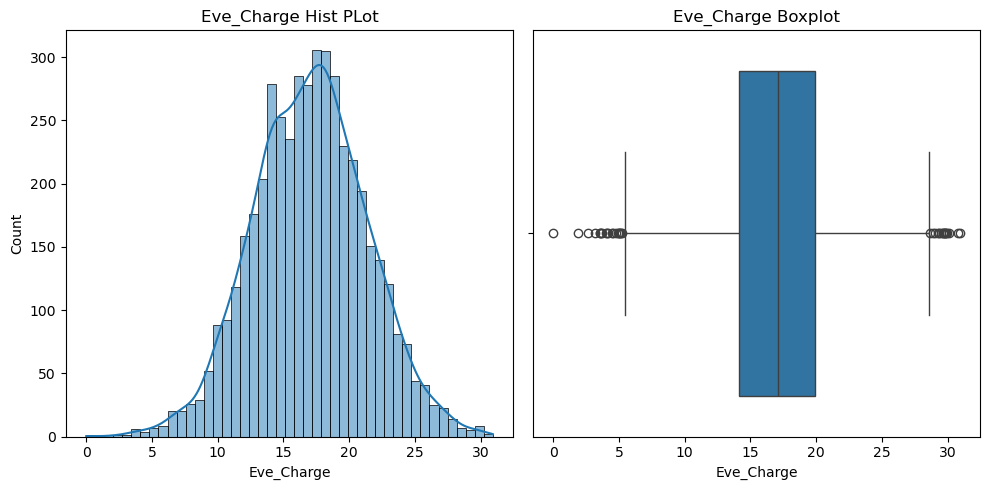

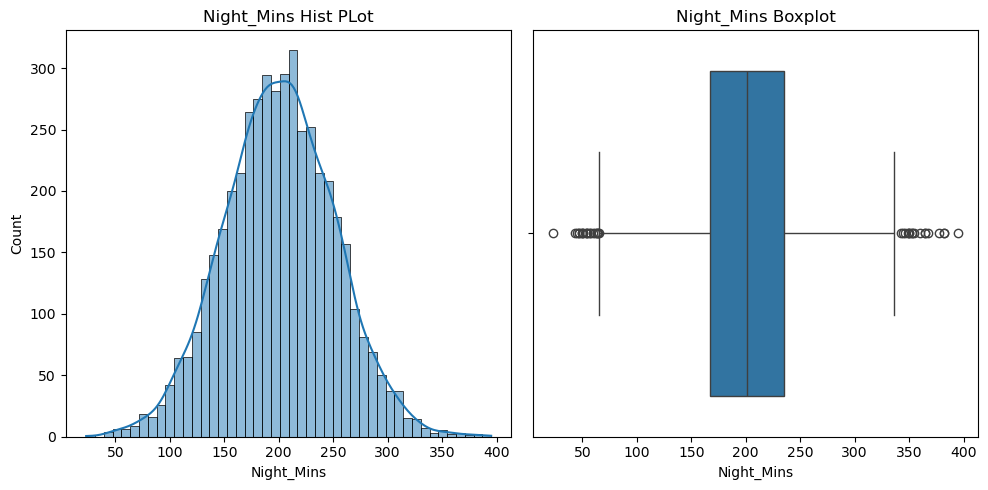

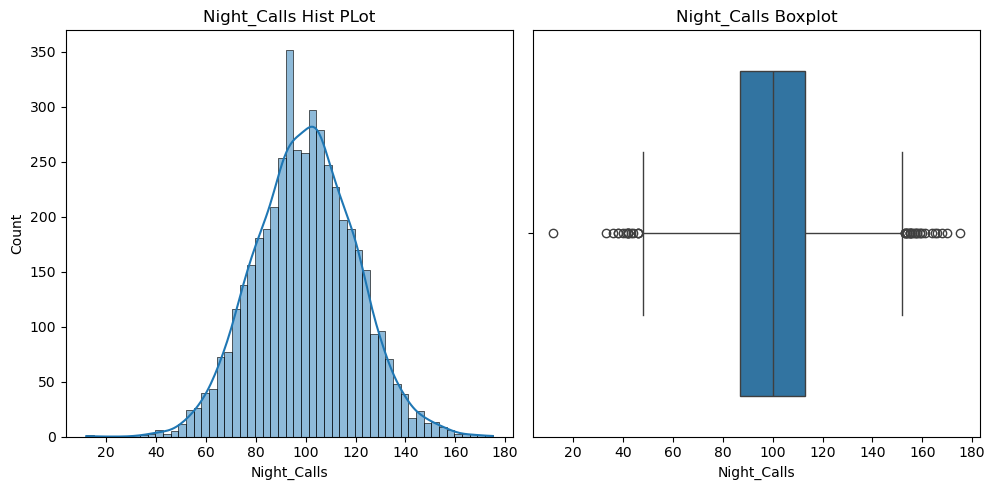

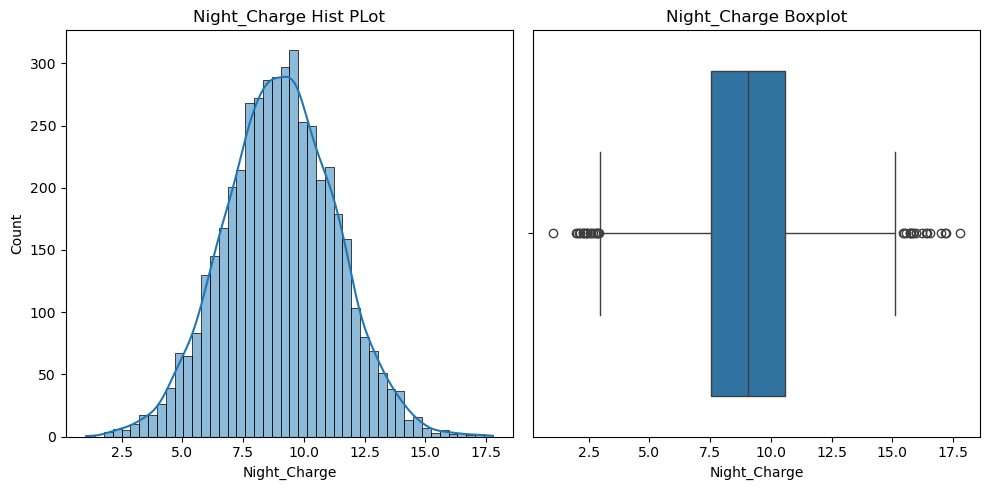

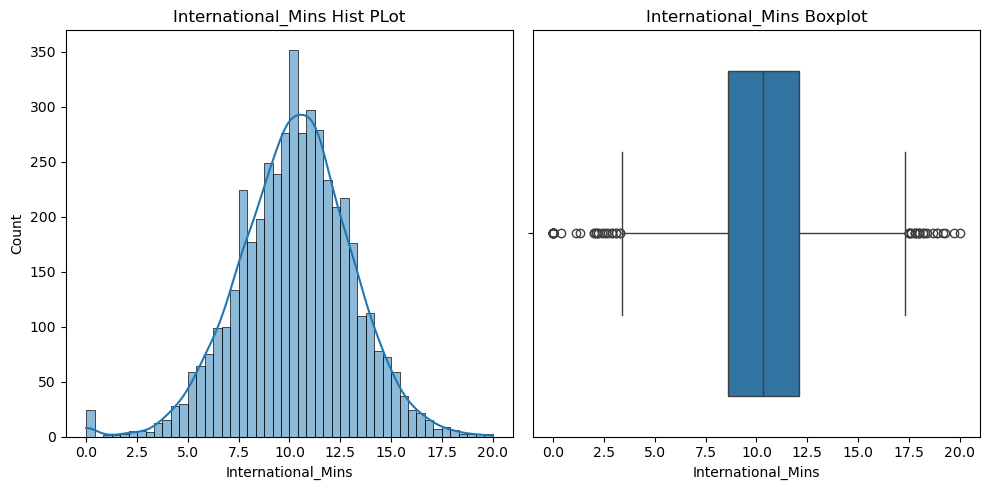

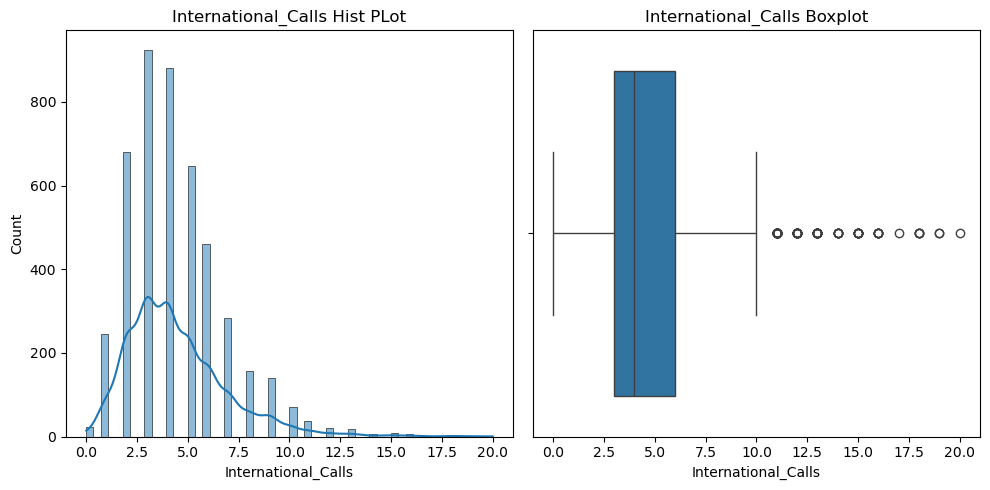

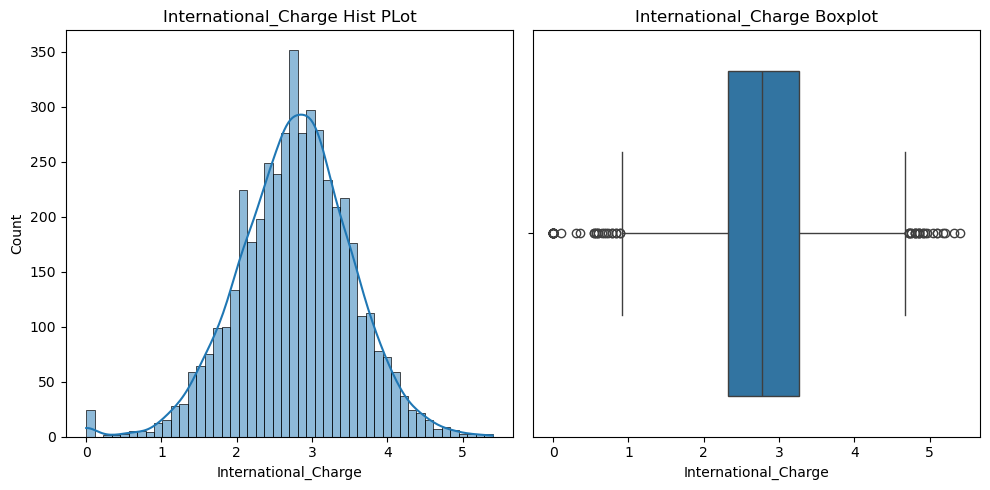

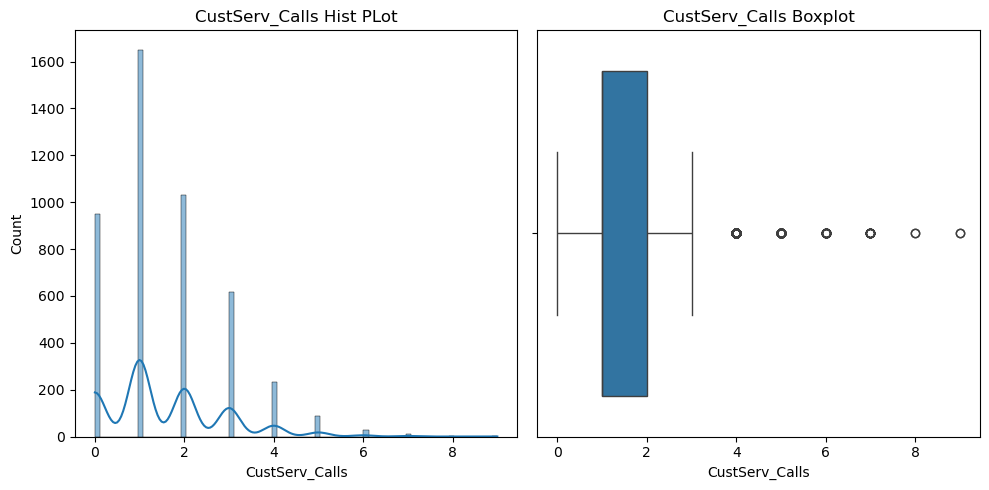

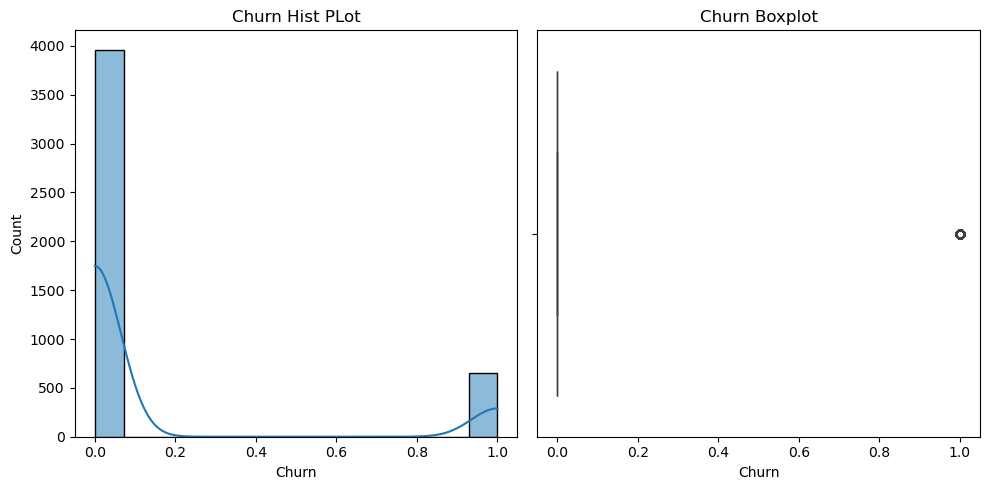

In [27]:
for cols in num_cols:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.histplot(df[cols],kde=True)
    plt.title(f'{cols} Hist PLot')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[cols])
    plt.title(f'{cols} Boxplot')

    plt.tight_layout()
    plt.show()

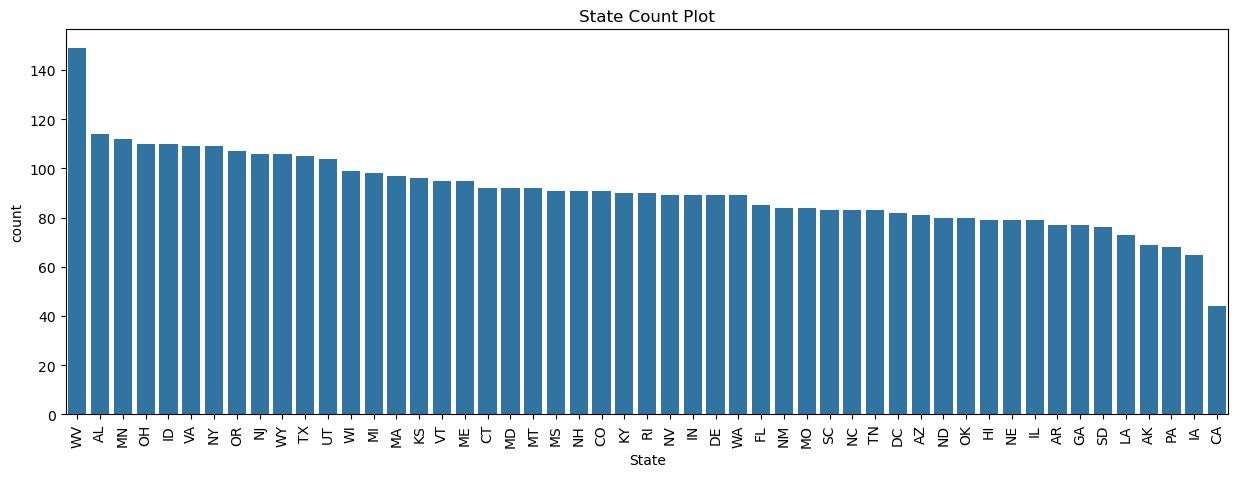

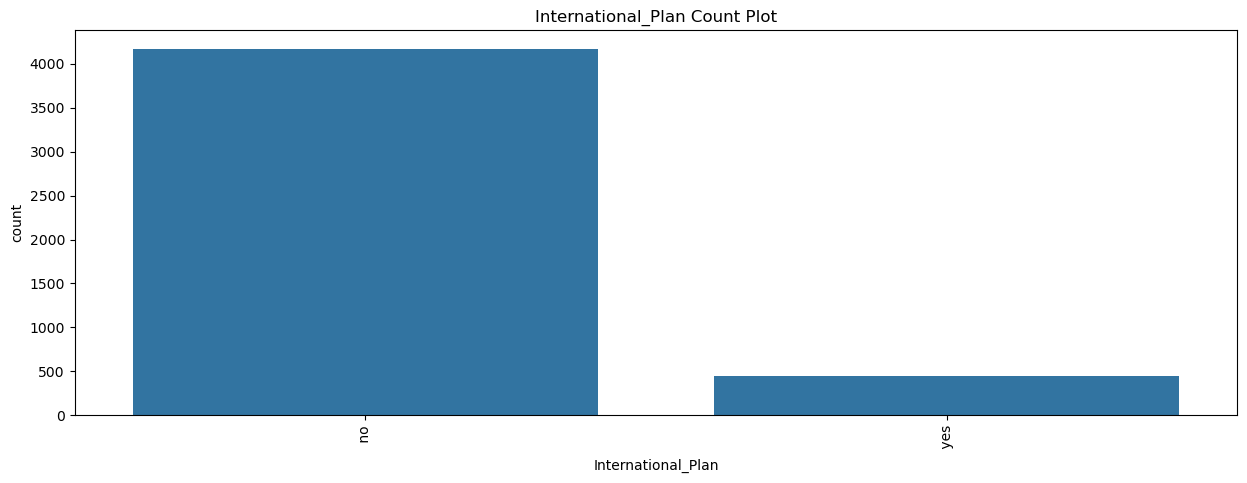

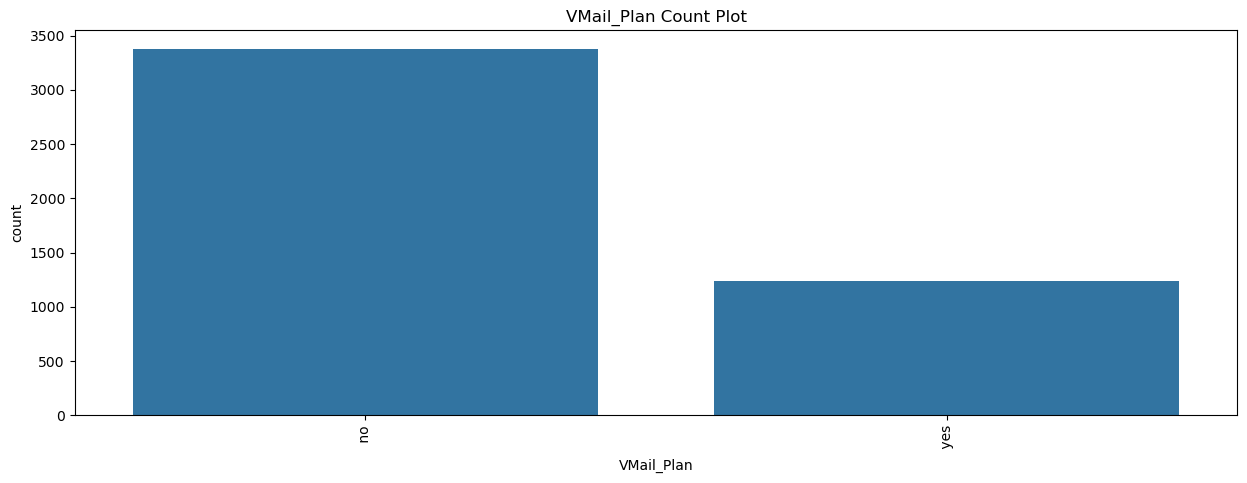

In [28]:
for cols in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df,x=cols,order=df[cols].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'{cols} Count Plot')
    plt.show()

In [29]:
df.skew(numeric_only = True)

Account_Length          0.106248
Area_Code               1.135333
VMail_Message           1.326734
Day_Mins               -0.002948
Day_Calls              -0.081013
Day_Charge             -0.002952
Eve_Mins               -0.005280
Eve_Calls              -0.017554
Eve_Charge             -0.005252
Night_Mins              0.020515
Night_Calls             0.030886
Night_Charge            0.020507
International_Mins     -0.220891
International_Calls     1.366420
International_Charge   -0.221342
CustServ_Calls          1.046800
Churn                   2.050965
dtype: float64

### Bivariate Analysis
#### Categorical vs Target

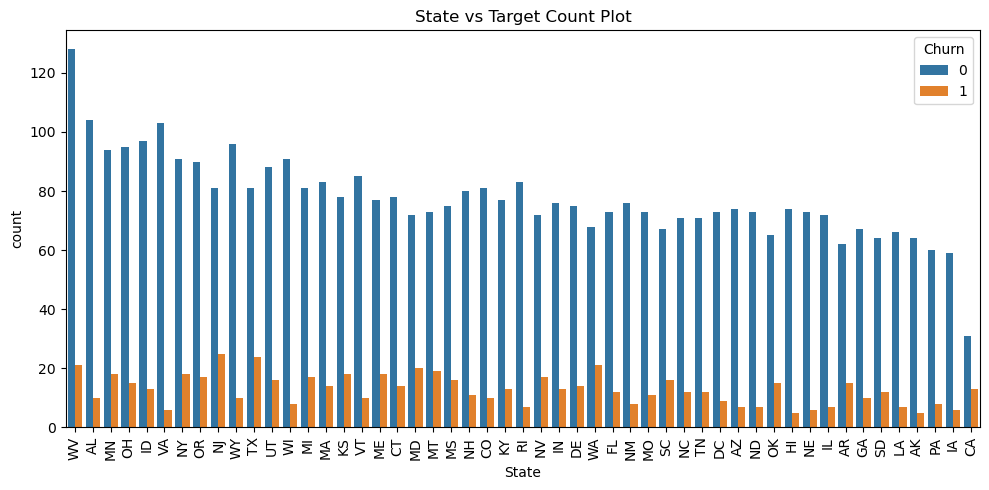

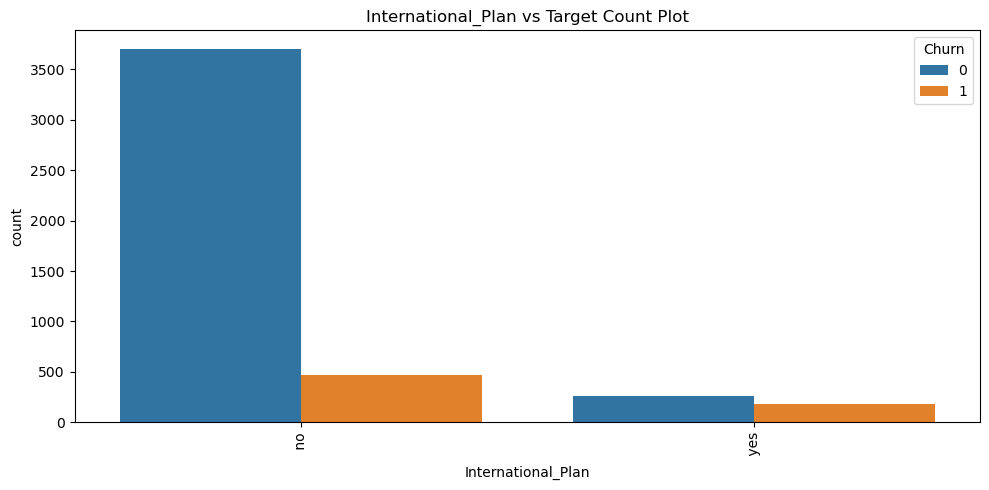

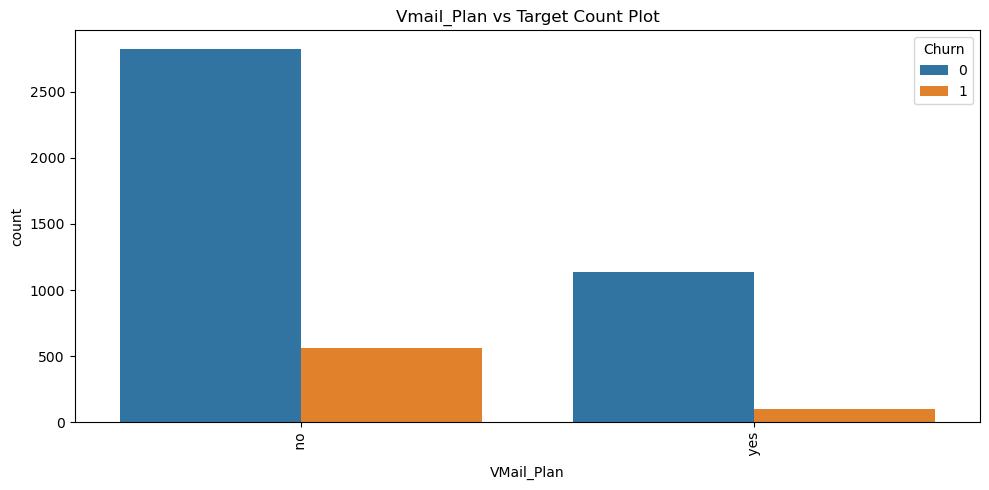

In [30]:
for cols in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data = df, x = cols, hue = 'Churn', order = df[cols].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'{cols.title()} vs Target Count Plot')
    plt.tight_layout()
    plt.show()

### Corr Heat Map

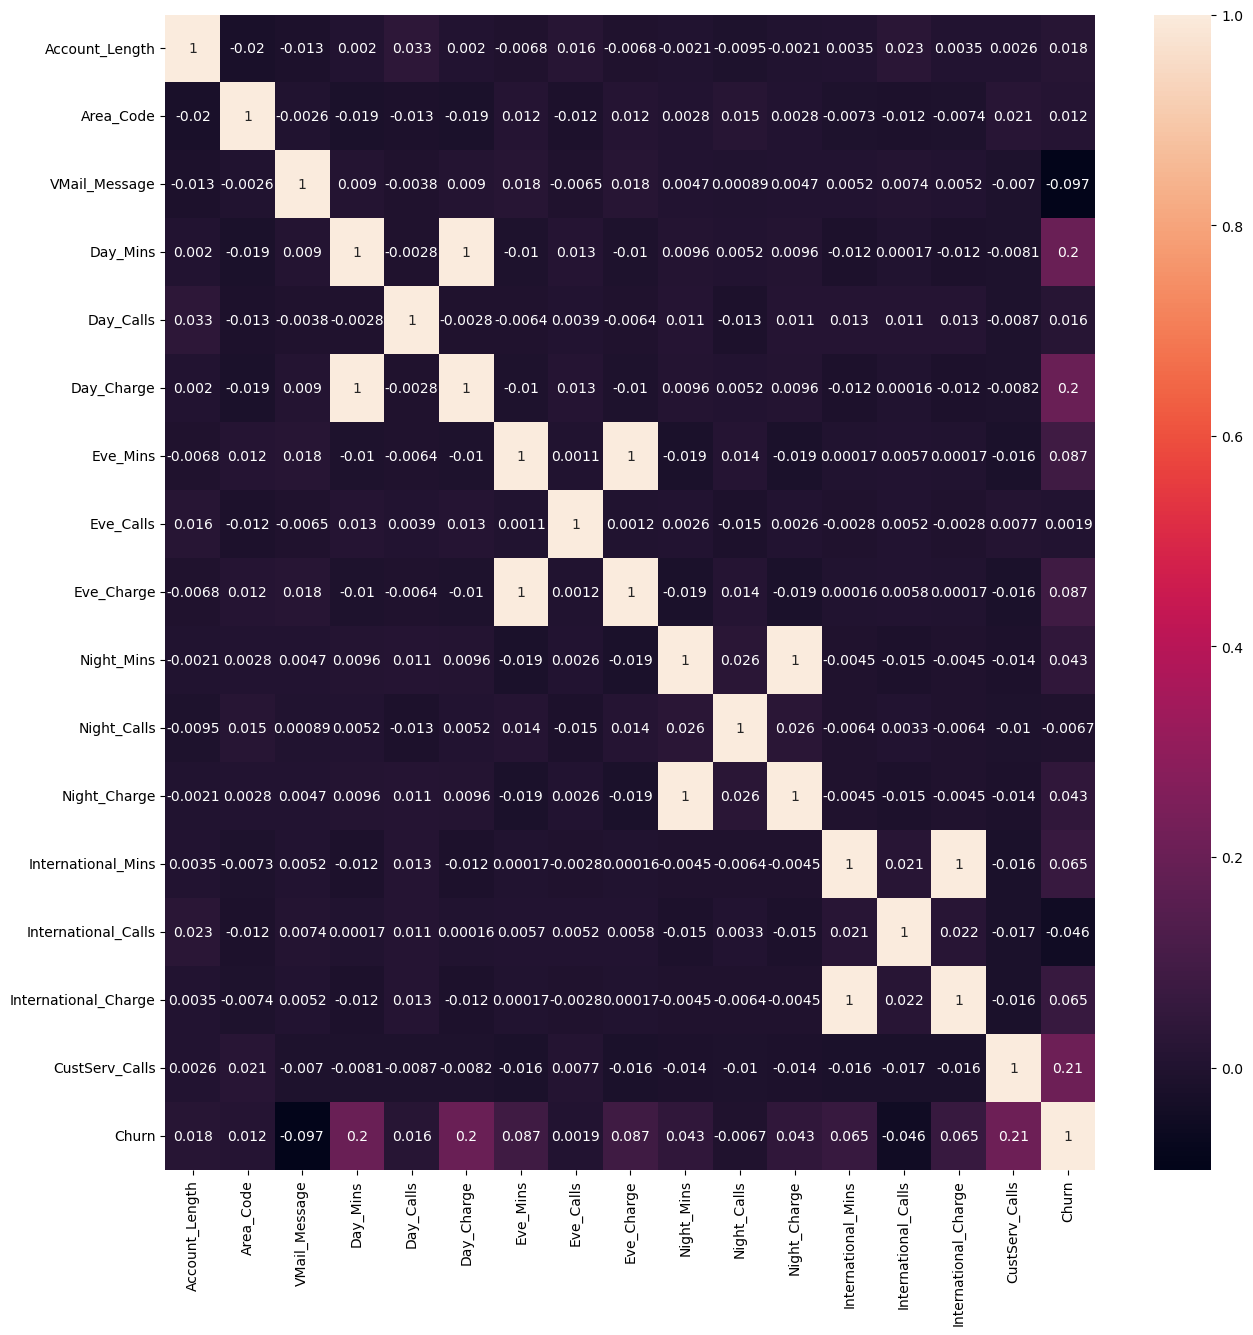

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

### Data Preprpcessing and Feature Engineering

To handle skewness and outliers - No Since we go planned to go with Tree Based Models

To convert International Plan and VMail Plan to int

Drop Phone number and State

Encode

#### Encoding

In [32]:
df['International_Plan'] = df['International_Plan'].str.strip().map({'no': 0, 'yes': 1})
df['VMail_Plan'] = df['VMail_Plan'].str.strip().map({'no': 0, 'yes': 1})

In [33]:
df = df.drop(columns = ['State','Phone'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Account_Length        4617 non-null   int64  
 1   Area_Code             4617 non-null   int64  
 2   International_Plan    4617 non-null   int64  
 3   VMail_Plan            4617 non-null   int64  
 4   VMail_Message         4617 non-null   int64  
 5   Day_Mins              4617 non-null   float64
 6   Day_Calls             4617 non-null   int64  
 7   Day_Charge            4617 non-null   float64
 8   Eve_Mins              4617 non-null   float64
 9   Eve_Calls             4617 non-null   int64  
 10  Eve_Charge            4617 non-null   float64
 11  Night_Mins            4617 non-null   float64
 12  Night_Calls           4617 non-null   int64  
 13  Night_Charge          4617 non-null   float64
 14  International_Mins    4617 non-null   float64
 15  International_Calls  

#### Feature Scaling and Train Test Split

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training a Model

#### Base - Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [41]:
base_model = LogisticRegression(random_state = 42, class_weight = 'balanced')
base_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [42]:
y_pred = base_model.predict(X_test_scaled)
y_proba = base_model.predict_proba(X_test_scaled)[:, 1]

In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

[[586 213]
 [ 29  96]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       799
           1       0.31      0.77      0.44       125

    accuracy                           0.74       924
   macro avg       0.63      0.75      0.64       924
weighted avg       0.87      0.74      0.78       924

ROC AUC: 0.8265131414267834


#### Tree Base Model 

In [44]:
from xgboost import XGBClassifier

In [45]:
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb = XGBClassifier(scale_pos_weight=scale)

In [46]:
print(scale)

5.954802259887006


In [47]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [48]:
y_predict = xgb.predict(X_test)

In [49]:
y_proba = xgb.predict_proba(X_test)[:, 1]

In [50]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

[[783  16]
 [ 22 103]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       799
           1       0.87      0.82      0.84       125

    accuracy                           0.96       924
   macro avg       0.92      0.90      0.91       924
weighted avg       0.96      0.96      0.96       924

ROC AUC: 0.9302027534418023


# Project Goal

In [51]:
df_final = X_test.copy()

In [52]:
df_final['actual_churn'] = y_test

In [53]:
df_final['churn_risk_score'] = xgb.predict_proba(X_test)[:, 1]

In [54]:
df_final['CHURN_FLAG'] = (df_final['churn_risk_score'] >= 0.5).astype(int)

In [55]:
df_final['CHURN_FLAG'] = df_final['CHURN_FLAG'].map({1: 'YES', 0: 'NO'})

In [56]:
df_final.to_csv("churn_predictions_final.csv", index=False)

### SHAP for Variable Influence

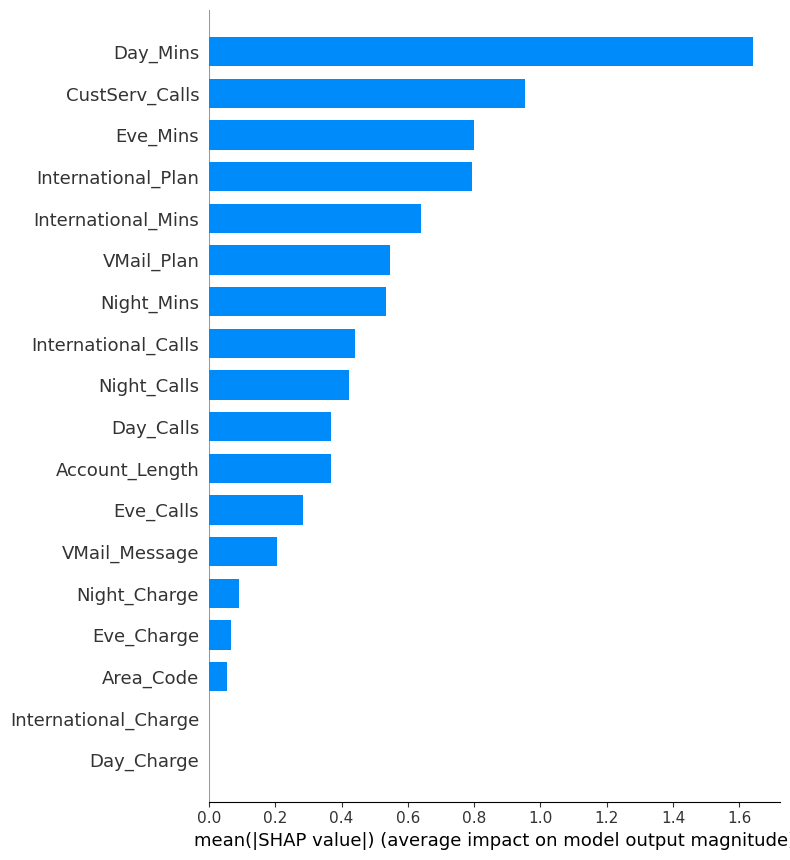

In [57]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar')  # Feature importance